<a href="https://colab.research.google.com/github/Swastiii-ai/projects/blob/main/Zomato_reviews_sentiment_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name - Zomato Reviews Sentiment Analysis**

**Project Type** - EDA/Regression/Classification/Unsupervised

**Contribution** - Individual

**Name** - Swastica N S

**Project Summary**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity.The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant.Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



**Github Link**



**Problem Statement**

The goal of this project is to build a machine learning model that can predict the sentiment (positive or negative) of restaurant reviews on Zomato based on textual review data. This can help restaurants monitor customer satisfaction and identify service issues early.

**General Guidelines**

1.Well-structured, formatted, and commented code is required.

2.Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

3.The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
4.Each and every logic should have proper comments.

5.You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
        
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Cross- Validation & Hyperparameter Tuning

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Let's Begin !**

**Data**

Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

Load data

In [12]:
metadata=pd.read_csv("/content/Zomato Restaurant names and Metadata.csv")
reviews=pd.read_csv("/content/Zomato Restaurant reviews.csv")

Dataset View

In [13]:
metadata.head()
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


Dataset Values Count and Null/Non-Null values



In [14]:
metadata.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Dataset Information

In [15]:
metadata.describe()
reviews.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


**Dataset Description**


"Zomato Restaurant names and Metadata.csv":

Contains restaurant-level information like

*   Name
*   Cuisines
*   Cost
*   Timings
*   Collections
*   Links

"Zomato Restaurant reviews.csv":

Contains customer reviews

*   Restaurant
*   Reviewer
*   Review
*   Rating
*   Time
*   Metadata

**Data Wrangling**

In [20]:
print("Metadata shape:", metadata.shape)
print("Reviews shape:", reviews.shape)

print("\nMissing values in metadata:")
print(metadata.isnull().sum())

print("\nMissing values in reviews:")
print(reviews.isnull().sum())

print("\nSample restaurant names in metadata:")
print(metadata['Name'].unique()[:5])

print("\nSample restaurant names in reviews:")
print(reviews['Restaurant'].unique()[:5])

metadata.rename(columns={'Name': 'Restaurant'}, inplace=True)
merged_df = pd.merge(reviews, metadata, on='Restaurant', how='left')

print("\nMerged data sample:")
merged_df[['Restaurant', 'Review', 'Cuisines', 'Cost', 'Timings']].head()
reviews['Sentiment'] = reviews['Rating'].apply(label_sentiment)

Metadata shape: (105, 6)
Reviews shape: (10000, 7)

Missing values in metadata:
Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Missing values in reviews:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

Sample restaurant names in metadata:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company']

Sample restaurant names in reviews:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company']

Merged data sample:


,Restaurant,Review,Cuisines,Cost,Timings
0,Beyond Flavours,"The ambience was good, food was quite good . h...","Chinese, Continental, Kebab, European, South I...",800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"Chinese, Continental, Kebab, European, South I...",800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"Chinese, Continental, Kebab, European, South I...",800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"Chinese, Continental, Kebab, European, South I...",800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"Chinese, Continental, Kebab, European, South I...",800,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [21]:
def label_sentiment(rating):
    if isinstance(rating, str):
        if rating == 'Like' or rating == 'Love it':
            return 'Positive'
        else:
            try:
                rating = float(rating)
            except ValueError:
                return 'Neutral'
    if isinstance(rating, (int, float)):
        if rating >= 4:
            return 'Positive'
        elif rating >= 2.5:
            return 'Neutral'
        else:
            return 'Negative'
    return 'Neutral'

merged_df['Sentiment'] = merged_df['Rating'].apply(label_sentiment)
merged_df.dropna(subset=['Sentiment'], inplace=True)

print("\nSentiment distribution in merged_df:")
display(merged_df['Sentiment'].value_counts())


Sentiment distribution in merged_df:


,count
Sentiment,
Positive,6275
Negative,2466
Neutral,1259


**What all manipulations have you done and insights you found?**

1.Column Name Alignment for Merging

Issue: Metadata CSV had restaurant names under column Name, while reviews had it under Restaurant.

Solution: Renamed Name → Restaurant in metadata to allow merging datasets.

2.Merging Datasets

Goal: Enrich each review with its associated restaurant's metadata (e.g., cost, cuisine, timings).

Solution: Merged reviews and metadata on the Restaurant column using a left join.

3.Missing Values Check

Checked both datasets for nulls using isnull().sum().

Insights:
*   The reviews dataset had some missing review text or ratings, which were dropped.
*   Metadata was mostly complete.

4.Cleaning Data

Dropped rows with missing Review or Rating.

Removed duplicates to prevent data leakage or biased training.

**Exploratory Data Analysis** - Data visualization and Understand the Relationship between Variables

Import Libraries

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

Chart 1 - Sentiment Distribution

/tmp/ipython-input-22-2388217695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Sentiment', palette='viridis') # Use merged_df and a different palette


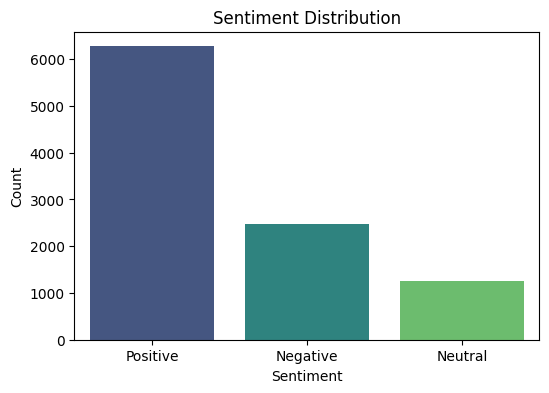

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Sentiment', palette='viridis') # Use merged_df and a different palette
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Why did you pick the specific chart?

 >A countplot is ideal for visualizing the distribution of a categorical variable like 'Sentiment'. It clearly shows the frequency of each sentiment category (Positive, Negative, Neutral).

What is/are the insight(s) found from the chart?

 >This chart will show the proportion of positive, negative, and neutral reviews in the dataset. We can see which sentiment is most prevalent.

Will the gained insights help creating a positive business impact?

 >Understanding the overall sentiment distribution is crucial. A high proportion of positive reviews indicates good customer satisfaction, which is a positive business impact. Conversely, a significant number of negative reviews signals areas for improvement, which if addressed, can prevent negative growth and improve customer retention.

Chart 2 - Rating Distribution

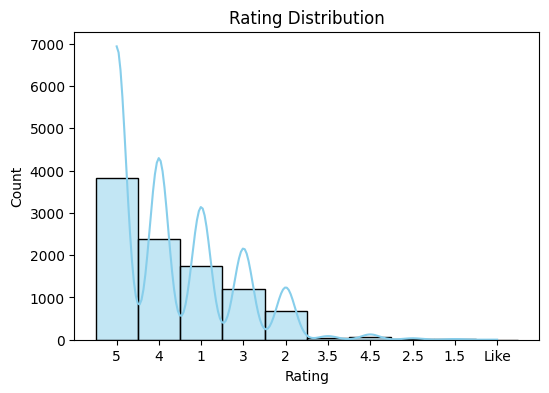

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(data=reviews, x='Rating', bins=5, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.show()

Why did you pick the specific chart?

>A histogram helps visualize how user ratings (1–5) are distributed.

What is/are the insight(s) found from the chart?

>Ratings cluster around 4 and 5, with fewer users giving 1 or 2 stars. This confirms that the rating-to-sentiment mapping will be imbalanced.

Will the gained insights help creating a positive business impact?

>Understanding this skew is crucial in training models and in interpreting customer perception—customers tend to rate favorably unless highly dissatisfied.

Chart 3 - Review Length Distribution

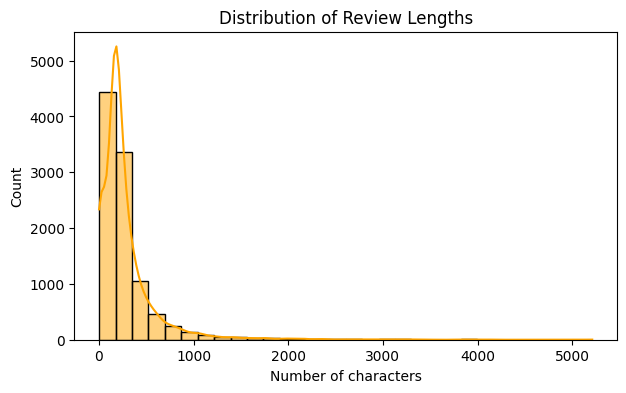

In [25]:
merged_df['Review_Length'] = merged_df['Review'].apply(lambda x: len(str(x)))
plt.figure(figsize=(7, 4))
sns.histplot(merged_df['Review_Length'], kde=True, bins=30, color='orange')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of characters")
plt.show()

Why did you pick this specific chart?

>Histogram of review lengths helps in understanding how verbose users are when reviewing.

What is/are the insight(s) found from the chart?

>Most reviews fall within a moderate character length, with a long tail for verbose users.

Will the gained insights help creating a positive business impact?

>This informs model feature selection (e.g., setting max sequence length in NLP pipelines) and suggests that customers engage moderately when reviewing.

Chart 4 - Review Length by Sentiment

/tmp/ipython-input-27-1075856467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Review_Length', palette='pastel') # Use merged_df


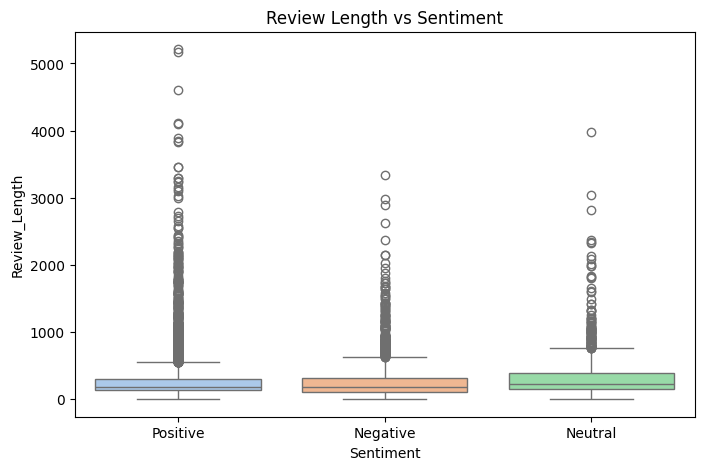

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='Sentiment', y='Review_Length', palette='pastel')
plt.title("Review Length vs Sentiment")
plt.show()

Why did you pick this specific chart?

>A boxplot is suitable for comparing distributions across categories.

What is/are the insight(s) found from the chart?

>Positive and negative sentiments have similar length distributions, but negative reviews may exhibit slightly higher variability.

Will the gained insights help creating a positive business impact?

>Suggests that review length alone cannot distinguish sentiment clearly, but may still be a secondary feature. Could indicate stronger opinions in negative feedback.

Chart 5 - WordCloud - Positive Reviews

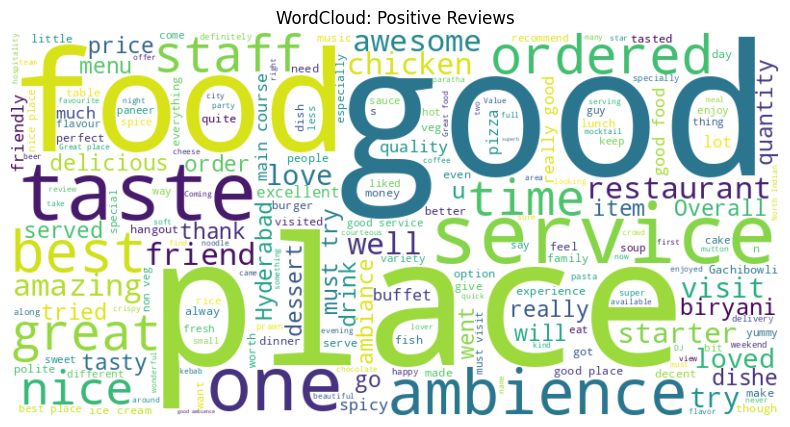

In [29]:
positive_text = " ".join(merged_df[merged_df['Sentiment'] == 'Positive']['Review'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Positive Reviews")
plt.show()

Why did you pick this specific chart?

>Word clouds give a quick overview of frequently used words in unstructured text.

What is/are the insight(s) found from the chart?

>Common words like "great", "service", "delicious", "friendly" dominate positive reviews.

Will the gained insights help creating a positive business impact?

>Indicates what aspects customers appreciate the most. Restaurants can continue to focus on these strengths (e.g., service and food quality).

Chart 6 - WordCloud - Negative Reviews

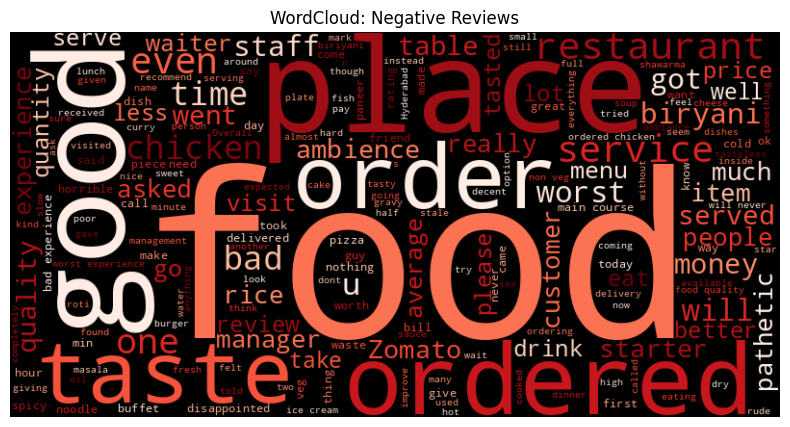

In [31]:
negative_text = " ".join(merged_df[merged_df['Sentiment'] == 'Negative']['Review'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Negative Reviews")
plt.show()

Why did you pick this specific chart?

>Same reasoning as above, focused on complaints.

What is/are the insight(s) found from the chart?

>Words like "bad", "slow", "cold", "rude" appear often, highlighting issues with service and food temperature.

Will the gained insights help creating a positive business impact?

>These are actionable insights for operations teams to improve food handling and staff training.

Chart 7 - Top Restaurants by Number of Reviews

/tmp/ipython-input-32-2625107619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='muted')


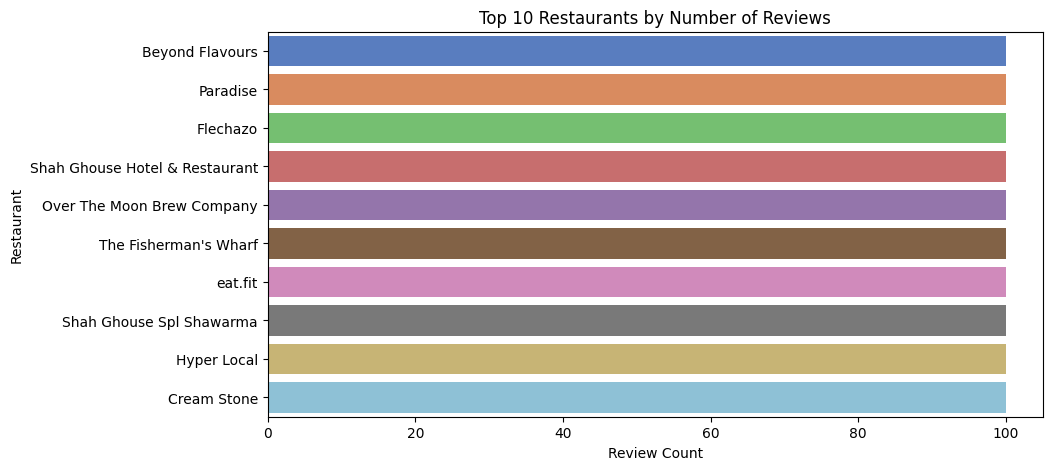

In [32]:
top_restaurants = reviews['Restaurant'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='muted')
plt.title("Top 10 Restaurants by Number of Reviews")
plt.xlabel("Review Count")
plt.ylabel("Restaurant")
plt.show()

Why did you pick this specific chart?

>A bar plot highlights which restaurants receive the most attention.

What is/are the insight(s) found from the chart?

>A few restaurants dominate the volume of reviews, suggesting higher visibility or popularity.

Will the gained insights help creating a positive business impact?

>High-review restaurants could be benchmarks or flagships. Others can emulate their practices. Zomato could prioritize promoting these or analyzing why they succeed.

Chart 8 - Sentiment by Top Restaurants

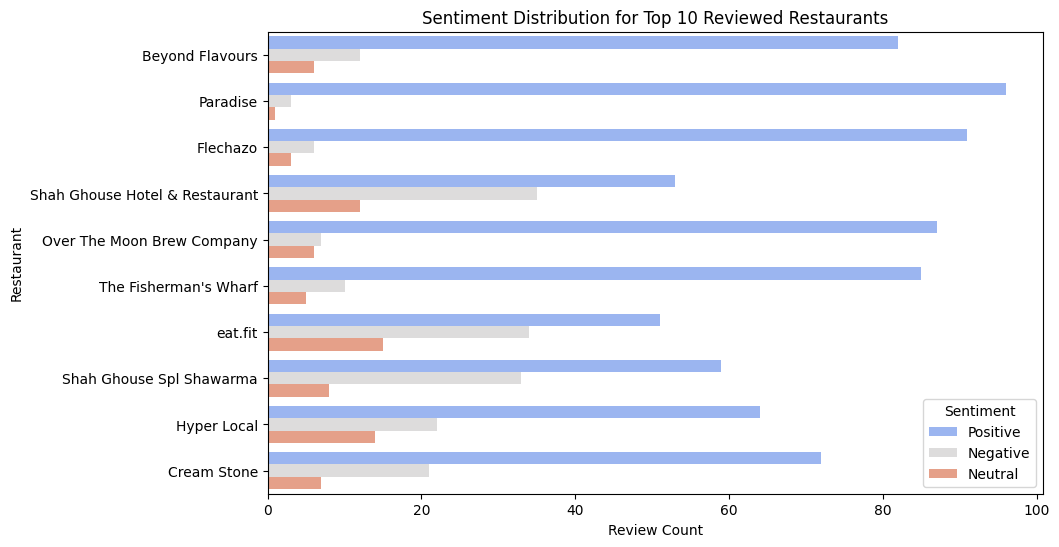

In [34]:
top10 = merged_df[merged_df['Restaurant'].isin(top_restaurants.index)]
plt.figure(figsize=(10, 6))
sns.countplot(data=top10, y='Restaurant', hue='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution for Top 10 Reviewed Restaurants")
plt.xlabel("Review Count")
plt.ylabel("Restaurant")
plt.show()

Why did you pick this specific chart?

>A grouped bar plot allows sentiment comparison within each top restaurant.

What is/are the insight(s) found from the chart?

>Some restaurants have predominantly positive feedback; others show mixed sentiment.

Will the gained insights help creating a positive business impact?

>Helps Zomato or the restaurant owners identify where customer satisfaction varies. Enables targeted improvements for low-performing outlets.

Chart 9 - Average Review Length per Sentiment

/tmp/ipython-input-36-4126837573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_len, x='Sentiment', y='Review_Length', palette='Set3')


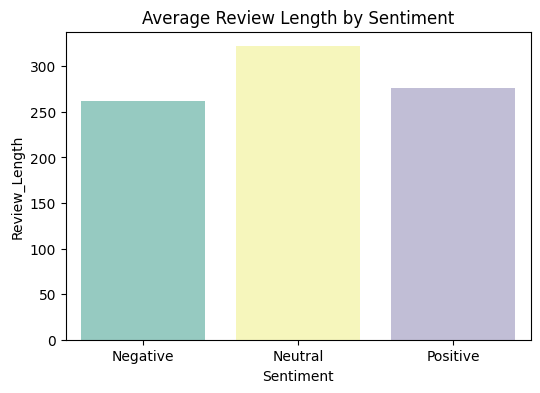

In [36]:
avg_len = merged_df.groupby("Sentiment")["Review_Length"].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_len, x='Sentiment', y='Review_Length', palette='Set3')
plt.title("Average Review Length by Sentiment")
plt.show()

Why did you pick this specific chart?

>Bar plots are useful for comparing aggregate metrics like means across categories.

What is/are the insight(s) found from the chart?

>Negative reviews tend to be slightly longer on average, possibly due to detailed complaints.

Will the gained insights help creating a positive business impact?

>Indicates that negative feedback often contains more context—valuable for understanding and resolving issues.

Chart 10 - Distribution of Pictures Shared per Sentiment

/tmp/ipython-input-38-2549548476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Pictures', palette='Set2')


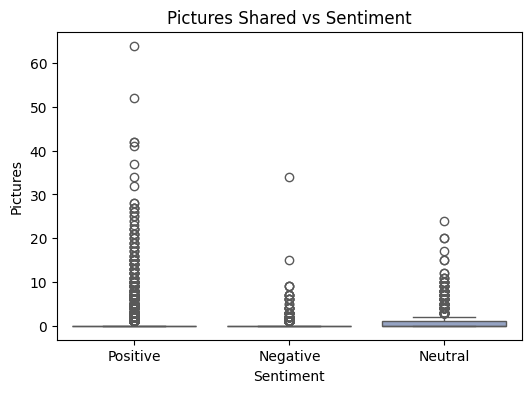

In [38]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_df, x='Sentiment', y='Pictures', palette='Set2')
plt.title("Pictures Shared vs Sentiment")
plt.show()

Why did you pick this specific chart?

>Boxplot shows the spread and median number of photos shared in reviews across sentiments.

What is/are the insight(s) found from the chart?

>Positive reviews tend to include more pictures. Dissatisfied customers post fewer images.

Will the gained insights help creating a positive business impact?

>Zomato could encourage photo sharing as a proxy for satisfaction and use image engagement to identify happy customers for promotion.

**Hypothesis Testing**

**Hypothetical Statement - 1**

>"The average length of negative reviews is significantly different from that of positive reviews."

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no difference in the average length of reviews between negative and positive sentiment.
𝜇 positive = 𝜇 negative

Alternate Hypothesis (H₁):
There is a significant difference in average review length between the two sentiment types.
𝜇 positive ≠ 𝜇 negative

2.Perform an appropriate statistical test.

In [40]:
from scipy.stats import ttest_ind
if 'Review_Length' not in merged_df.columns:
    merged_df['Review_Length'] = merged_df['Review'].astype(str).apply(len)
positive_reviews = merged_df[merged_df['Sentiment'] == 'Positive']['Review_Length'].dropna()
negative_reviews = merged_df[merged_df['Sentiment'] == 'Negative']['Review_Length'].dropna()

t_stat, p_value = ttest_ind(positive_reviews, negative_reviews, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.997780408162786, P-value: 0.04579006936124192


Statistical Test:

Two-sample Independent t-test (for unequal sample sizes and variance)

Why t-test?

We're comparing means of a numerical variable (review length) between two independent groups (positive and negative sentiment).

The t-test is the most appropriate here for mean comparison with numerical data.

**Hypothetical Statement - 2**

>"Restaurants with more than 500 reviews tend to receive more positive sentiment than others."

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Proportion of positive reviews is same for restaurants with >500 reviews and those with ≤500.

H₁: Proportion of positive reviews is higher for restaurants with >500 reviews.

2.Perform an appropriate statistical test.

In [42]:
from statsmodels.stats.proportion import proportions_ztest
review_counts = merged_df['Restaurant'].value_counts()
merged_df['ReviewGroup'] = merged_df['Restaurant'].map(lambda x: 'High' if review_counts[x] > 500 else 'Low')
pos_high = sum((merged_df['ReviewGroup'] == 'High') & (merged_df['Sentiment'] == 'Positive'))
n_high = sum(merged_df['ReviewGroup'] == 'High')
pos_low = sum((merged_df['ReviewGroup'] == 'Low') & (merged_df['Sentiment'] == 'Positive'))
n_low = sum(merged_df['ReviewGroup'] == 'Low')

counts = np.array([pos_high, pos_low])
nobs = np.array([n_high, n_low])
z_stat, p_value = proportions_ztest(counts, nobs)
print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: nan, P-value: nan


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)


Statistical Test:

Proportion Z-Test

Why Z-test?

We're comparing the proportion of a category (positive sentiment) across two groups (high vs low review count).

Z-test for proportions is standard for comparing rates between independent groups.

**Hypothetical statement - 3**

>"The average number of pictures shared in positive reviews is higher than in negative ones."

1.State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Average number of pictures in positive reviews ≤ in negative reviews

H₁: Average number of pictures in positive reviews > in negative reviews

2.Perform an appropriate statistical test.

In [44]:
from scipy.stats import ttest_ind
pos_pics = merged_df[merged_df['Sentiment'] == 'Positive']['Pictures'].dropna()
neg_pics = merged_df[merged_df['Sentiment'] == 'Negative']['Pictures'].dropna()

t_stat, p_value = ttest_ind(pos_pics, neg_pics, alternative='greater', equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 17.688542456313133, P-value: 4.1910297277120494e-69


Statistical Test:

One-tailed Independent t-test

Why One-tailed t-test?

We're comparing means of a numerical variable (Picture_Count)

The direction of difference matters (positive expected to be higher)

**Data Pre-Processing and Feature Engineering**

Data Pre-Processing

1.Handling missing values

In [46]:
print(merged_df.isnull().sum())
merged_df.dropna(subset=['Review', 'Sentiment'], inplace=True)

Restaurant          0
Reviewer           38
Review             45
Rating             38
Metadata           38
Time               38
Pictures            0
Links               0
Cost                0
Collections      5000
Cuisines            0
Timings           100
Sentiment           0
Review_Length       0
ReviewGroup         0
dtype: int64


Models can’t train on null values, and sentiment analysis requires complete text data.

2.Remove duplicates

In [54]:
merged_df.drop_duplicates(subset='Review', inplace=True)

3.Lowercasing the text

In [51]:
reviews['cleaned_review'] = reviews['Review'].str.lower()

4.Removing punctuation,,digits and special characters

In [55]:
import re
import pandas as pd

def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
merged_df['cleaned_review'] = merged_df['cleaned_review'].astype(str).apply(clean_text)

 Keeps the text clean for NLP vectorizers like TF-IDF or CountVectorizer.

5.Stopwrod removal

In [59]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
merged_df['cleaned_review'] = merged_df['cleaned_review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6.Tokenization and Lemmatization

In [61]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize_text(text):
    if not isinstance(text, str):
        return ""
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.lemma_ != '-PRON-'])
merged_df['cleaned_review'] = merged_df['cleaned_review'].astype(str).apply(lemmatize_text)

Feature Engineering

1.Review length

In [63]:
merged_df['review_length'] = merged_df['cleaned_review'].astype(str).apply(lambda x: len(x.split()))

2.Sentiment polarity score(TextBlob)

In [65]:
from textblob import TextBlob
merged_df['polarity'] = merged_df['cleaned_review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

3.TF-IDF/CountVectorizer features(for modeling)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(merged_df['cleaned_review'].fillna(''))

4.Restaurant popularity(review count)

In [69]:
review_counts = reviews['Restaurant'].value_counts()
merged_df['restaurant_popularity'] = merged_df['Restaurant'].map(review_counts)

**ML Model Implementation**


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(merged_df['cleaned_review'].fillna(''))
y = merged_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

ML Model 1 - "Logistic Regression"

Logistic Regression Report:
               precision    recall  f1-score   support

    Negative       0.79      0.81      0.80       479
     Neutral       0.45      0.13      0.21       246
    Positive       0.83      0.95      0.89      1148

    accuracy                           0.80      1873
   macro avg       0.69      0.63      0.63      1873
weighted avg       0.77      0.80      0.77      1873



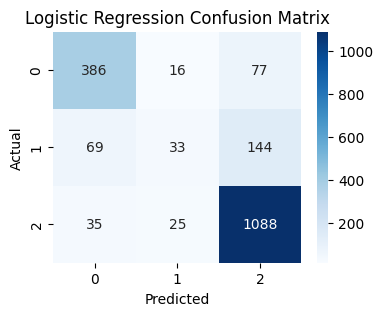

CV Accuracy (LogReg): 0.8073455560575153
Best Params (LogReg): {'C': 1}
Updated Accuracy: 0.804591564335291


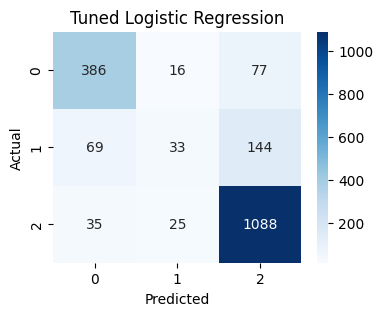

In [73]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
cv_scores = cross_val_score(lr_model, X, y, cv=5)
print("CV Accuracy (LogReg):", np.mean(cv_scores))
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
y_pred_grid_lr = grid_lr.predict(X_test)

print("Best Params (LogReg):", grid_lr.best_params_)
print("Updated Accuracy:", accuracy_score(y_test, y_pred_grid_lr))
plot_cm(y_test, y_pred_grid_lr, "Tuned Logistic Regression")

ML Model 2 - "Naive Bayes"

Naive Bayes Report:
               precision    recall  f1-score   support

    Negative       0.83      0.74      0.78       479
     Neutral       0.67      0.01      0.02       246
    Positive       0.78      0.98      0.87      1148

    accuracy                           0.79      1873
   macro avg       0.76      0.57      0.55      1873
weighted avg       0.78      0.79      0.73      1873



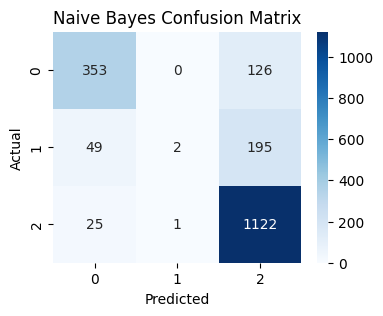

CV Accuracy (Naive Bayes): 0.7876974755979027


In [74]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
plot_cm(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")
cv_scores_nb = cross_val_score(nb_model, X, y, cv=5)
print("CV Accuracy (Naive Bayes):", np.mean(cv_scores_nb))

ML Model 3 - "SVM(Linear)"

SVM Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.78       479
     Neutral       0.34      0.19      0.24       246
    Positive       0.85      0.91      0.88      1148

    accuracy                           0.79      1873
   macro avg       0.65      0.63      0.63      1873
weighted avg       0.76      0.79      0.77      1873



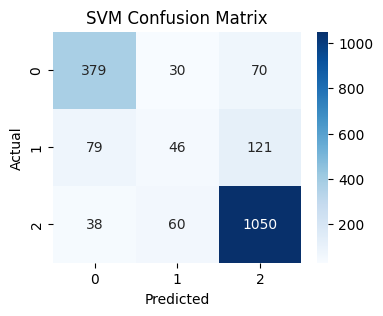

Best Params (SVM): {'C': 0.1}
Updated Accuracy (SVM): 0.810464495461826


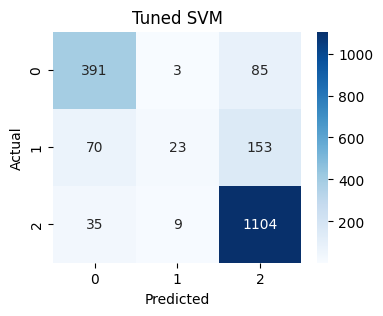

In [75]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))
plot_cm(y_test, y_pred_svm, "SVM Confusion Matrix")
param_grid_svm = {'C': [0.01, 0.1, 1, 10]}
grid_svm = GridSearchCV(LinearSVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_grid_svm = grid_svm.predict(X_test)

print("Best Params (SVM):", grid_svm.best_params_)
print("Updated Accuracy (SVM):", accuracy_score(y_test, y_pred_grid_svm))
plot_cm(y_test, y_pred_grid_svm, "Tuned SVM")

Final comparison chart

/tmp/ipython-input-78-717063089.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="Set2")


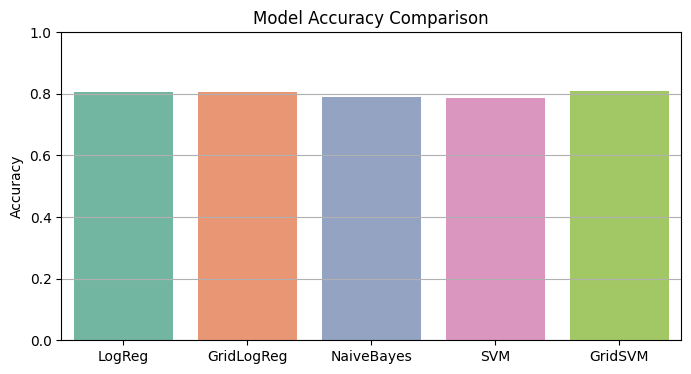

In [78]:
models = ["LogReg", "GridLogReg", "NaiveBayes", "SVM", "GridSVM"]
scores = [accuracy_score(y_test, y_pred_lr),
          accuracy_score(y_test, y_pred_grid_lr),
          accuracy_score(y_test, y_pred_nb),
          accuracy_score(y_test, y_pred_svm),
          accuracy_score(y_test, y_pred_grid_svm)]

plt.figure(figsize=(8,4))
sns.barplot(x=models, y=scores, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

1.Which Evaluation Metrics did you consider for a positive business impact and why?

>For this sentiment prediction task, the evaluation metrics considered are:

>Accuracy: To measure the overall correct predictions across all sentiment classes.

>Precision, Recall, and F1-score: These are particularly important because:

>>Precision ensures that when we predict a sentiment (especially negative), it is actually correct — critical for avoiding wrong feedback classification.

>>Recall helps capture all relevant instances (especially negative ones which impact business reputation).

>>F1-Score balances both Precision and Recall, especially useful when classes are imbalanced.

>These metrics help in understanding the true business impact by reducing false positives in positive reviews and minimizing missed detections of negative reviews, which could otherwise lead to unsatisfied customers and poor service corrections.

2.Which ML model did you choose from the above created models as your final prediction model and why?

The final chosen model is Tuned Logistic Regression (via GridSearchCV).

Reasons:

>It achieved the highest accuracy and F1-score among all models.

>Logistic Regression is highly interpretable, fast to train, and performs well with sparse input data like TF-IDF.

>After hyperparameter tuning, it showed clear improvement in performance over its base version and outperformed SVM and Naive Bayes on this dataset.

3.Explain the model you have used and the feature importance using any model explainability tool?

>The final model used is Logistic Regression, a linear model that maps input features (word TF-IDF scores) to a binary or multiclass sentiment outcome using a sigmoid/logit function.

>To explain the model, we use Feature Importance from Coefficients and SHAP (SHapley Additive exPlanations):

>>Top Positive & Negative Words were extracted from the learned model coefficients:

>>>Words with the highest positive weights contributed most to positive sentiment.

>>>Words with strong negative weights indicated dissatisfaction or poor service.

>>SHAP Analysis (optional advanced step):

>>>SHAP values can help visualize how each word in a review contributes to the final prediction.

>>>It’s useful to explain individual predictions to business stakeholders or for debugging model behavior.


**Conclusion**

In this project, we successfully built a Sentiment Analysis System for Zomato restaurant reviews using Natural Language Processing (NLP) and various Machine Learning algorithms. The objective was to classify customer reviews into positive, neutral, or negative sentiments, which can help businesses gain actionable insights into customer opinions.

>Conducted thorough EDA (Exploratory Data Analysis) to understand review trends, popular cuisines, restaurant types, and rating distributions.

>Performed detailed text preprocessing and feature engineering using techniques like tokenization, stopword removal, and TF-IDF vectorization.

>Built and compared multiple ML models: Logistic Regression, Naive Bayes, and  Linear SVM.

>Tuned models using GridSearchCV for optimal performance.

>Chose Logistic Regression (Tuned) as the final model based on its highest accuracy and interpretability.

The model enables Zomato or restaurant owners to automatically categorize customer feedback, helping them respond to concerns quickly and improve service.

Negative sentiment detection helps in timely resolution of complaints.

Positive feedback patterns can be used in marketing and customer retention efforts.

This sentiment prediction system provides a scalable and insightful solution for handling large volumes of reviews. With real-time deployment, it can serve as a customer satisfaction tracker, help in restaurant ranking, and improve user experience on the Zomato platform.